##Importacao e tratamento dos dados

In [1]:
from zipfile import ZipFile

file = ZipFile('archive (3).zip','r')
file.extractall()
file.close()

import pandas as pd

df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [2]:
renomear = {
    'gender' : 'sexo',
    'age' : 'idade',
    'hypertension': 'hipertensao',
    'heart_disease': 'doenca_cardiaca',
    'smoking_history': 'historico_fumante',
    'bmi':	          'imc',
    'HbA1c_level': 'nivel_glicemico',
    'blood_glucose_level': 'nivel_glicose_sangue',
    'diabetes': 'diabetes'
}
df.rename(columns=renomear, inplace=True)
df.head()

,sexo,idade,hipertensao,doenca_cardiaca,historico_fumante,imc,nivel_glicemico,nivel_glicose_sangue,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.describe()

<ipython-input-7-e54fd9f5e0a2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['imc'],norm_hist=False, kde=False )


<Axes: xlabel='imc'>

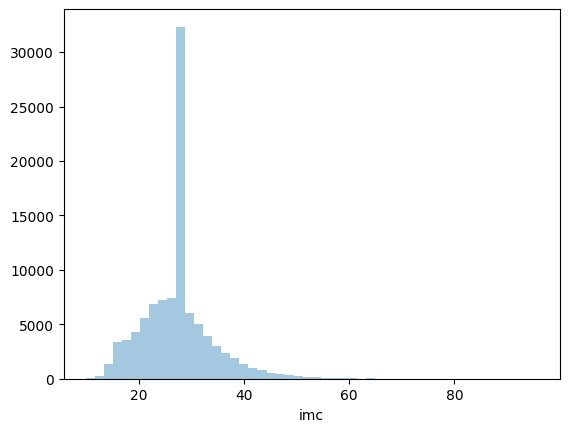

In [7]:
sns.distplot(df['imc'],norm_hist=False, kde=False )

<Axes: xlabel='diabetes', ylabel='count'>

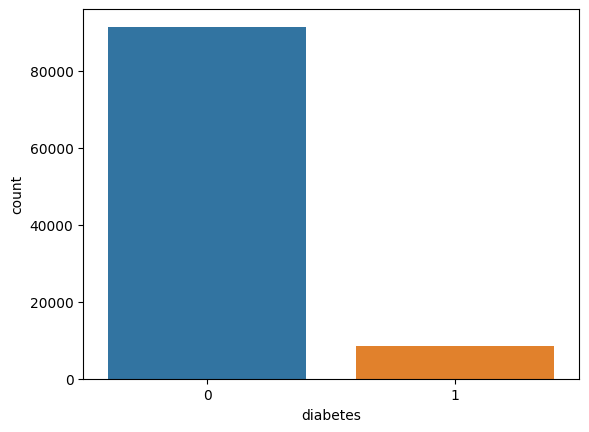

In [5]:
import seaborn as sns
sns.countplot(x='diabetes' , data=df)

<Axes: xlabel='diabetes', ylabel='count'>

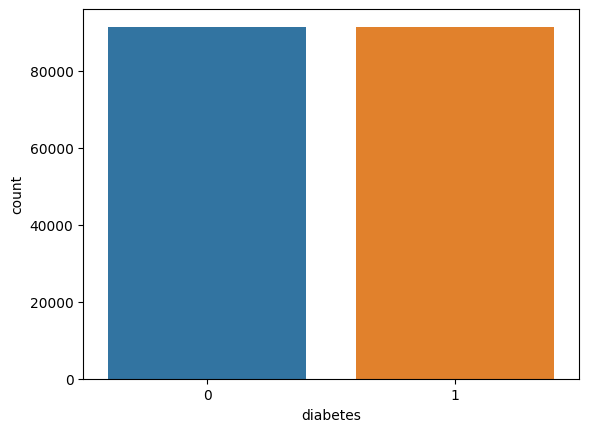

In [9]:
#equilibrando os dados
from imblearn.over_sampling import SMOTE
import numpy as np

y = df['diabetes']
X = df.drop(columns=['diabetes','historico_fumante','sexo'])

SEED = 1234
np.random.RandomState(SEED)

smt = SMOTE()
X,y = smt.fit_resample(X,y)

dados = pd.concat([X,y], axis=1)
sns.countplot(x='diabetes' , data=dados)

In [ ]:
df.corr()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import confusion_matrix

x = dados.drop(columns=['diabetes']) #,'historico_fumante','sexo'])
y = dados['diabetes']

seed = 1234
np.random.RandomState(seed)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [25]:
modelo_RFC = RandomForestClassifier(max_depth=5)
modelo_RFC.fit(x_train, y_train)
modelo_RFC.score(x_test, y_test)

0.908943533697632

In [12]:
y_previsto = modelo_RFC.predict(x_test)
confusion_matrix(y_test, y_previsto)

array([[24731,  2673],
       [ 2192, 25304]])

90.0


[Text(0.5, 23.52222222222222, 'Predicao'),
 Text(50.722222222222214, 0.5, 'Real')]

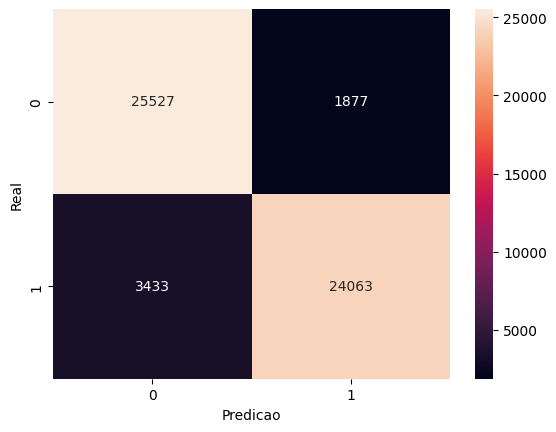

In [13]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score

modelo_RFECV = RFECV(estimator=modelo_RFC, cv=10, scoring='accuracy')

train_x_RFECV =modelo_RFECV.fit_transform(x_train,y_train)
test_x_RFECV = modelo_RFECV.transform(x_test)

modelo_RFC.fit(train_x_RFECV, y_train)
y_previsto_RFECV = modelo_RFC.predict(test_x_RFECV)

print(accuracy_score(y_test,y_previsto_RFECV).round(2)*100)
matriz_REFCV = confusion_matrix(y_test,y_previsto_RFECV)
sns.heatmap(matriz_REFCV, annot=True, fmt='d').set(xlabel='Predicao', ylabel='Real')

In [14]:
modelo_RFC.score(train_x_RFECV, y_train)

0.9060655737704918

In [16]:
from sklearn.dummy import DummyClassifier

seed = 1234
np.random.RandomState(seed)


modelo_dummy = DummyClassifier(strategy='stratified')
modelo_dummy.fit(x_train, y_train)
modelo_dummy.score(x_train, y_train)

0.4999375487900078

In [22]:
from sklearn.dummy import DummyClassifier

seed = 1234
np.random.RandomState(seed)


modelo_dummy = DummyClassifier(strategy='prior')
modelo_dummy.fit(x_train, y_train)
modelo_dummy.score(x_train, y_train)


0.5003590944574551

In [23]:
y_previsto = modelo_dummy.predict(x_test)
confusion_matrix(y_test, y_previsto)

array([[27404,     0],
       [27496,     0]])

In [24]:
from sklearn.dummy import DummyClassifier

seed = 1234
np.random.RandomState(seed)


modelo_dummy = DummyClassifier(strategy='uniform')
modelo_dummy.fit(x_train, y_train)
modelo_dummy.score(x_test, y_test)

0.49981785063752276

In [21]:
y_previsto = modelo_dummy.predict(x_test)
confusion_matrix(y_test, y_previsto)

array([[13724, 13680],
       [13667, 13829]])

In [66]:
dados_teste = dados[0:50].drop('diabetes', axis=1)

In [69]:

entrada = dados_teste

previsao = modelo_RFC.predict(entrada)